In [1]:
# This code will determine the position of the caustic and critical curves for a planet-star lensing system

In [2]:
#Import the required packages

import numpy as np
import matplotlib.pyplot as plot
import pylab

In [3]:
#Below are the required equations to perform this analysis

In [4]:
#define the ratio of the first and second masses to the total mass of the system as e1 and e2
def e1(m1,m2):
    return m1/(m1+m2)

In [5]:
def e2(m1,m2):
    return m2/(m1+m2)

In [6]:
#define the lens equation Lens, and its complex conjugate LensStar
def Lens(m1,m2,zs,z):
    return z+e1(m1,m2)/(-zs)+e2(m1,m2)/(xs-zs)

In [7]:
def LensStar(m1,m2):
    return zstar+e1/(z1-z)+e2/(z2-z)

In [8]:
# Define the determinate of the Jacobian of the Lens equation
def detJ(z,zstar,m1,m2):
    return 1-(e1(m1,m2)/(zstar)**2+e2(m1,m2)/(xs-zstar)**2)*(e1(m1,m2)/(z)**2+e2(m1,m2)/(x-z)**2)
# The critical curves are defined by the position z where detJ=0
# The caustic curves are given by the values of zeta (given by the lens equation) when detJ=0

In [9]:
# The first Section of this code determines the position of both the critical and caustic curves for a
# star-planet system for various distances, x, between the star and planet.

In [10]:
# create a plot of the caustic curves and critical image position
def CriticalAndCaustic(N): # N is proportional to the number of points used
    PhiSteps = [] # define lists of Phi,and the real and imaginary portions of 
    zetaReal = [] # z (the critical curve positions), denoted as Roots, and 
    zetaImag = [] # zeta (the caustic curves).
    RealRoots = []
    ImagRoots = []
    m1=100.
    m2=0.3
    i = 0
    while i/(2*np.pi)<N: # for values of i which are less than N*2*pi to
        Phi = i*2*np.pi/N # define phi for values of 0 to 2*pi
        # to plot the curves we must solve the equation for the conjugate of z.
        coeff=[-np.exp(1j*Phi),2. * x *np.exp(Phi*1j), - x**2 * np.exp(1j*Phi) + e1(m1,m2) + e2(m1,m2), -2.*e1(m1,m2)*x, x**2. * e1(m1,m2)]
        # Write the coefficients of the polynomial and solve to find the complex conjugate of z
        Solutions = np.roots(coeff)
        #this gives 3 or 4 complex solutions for each value of phi
        PhiSteps.append(Phi)
        #save the real portions and the negative of the imaginary portions to be the x and y positions of the critical curve
        RealRoots.append(Solutions.real[0])
        RealRoots.append(Solutions.real[1])
        RealRoots.append(Solutions.real[2])
        ImagRoots.append(-1.*Solutions.imag[0])
        ImagRoots.append(-1.*Solutions.imag[1])
        ImagRoots.append(-1.*Solutions.imag[2])
        if len(Solutions) == 4: #if there is a fourth solution save that too
            RealRoots.append(Solutions.real[3])
            ImagRoots.append(-1.*Solutions.imag[3])
        #Now solve the lens equation to find the complex values of zeta for each solution
        zeta = Solutions.real[0]-1j*Solutions.imag[0]-e1(m1,m2)/(Solutions[0])-e2(m1,m2)/(Solutions[0]-x)
        #append the real and imaginary portions as the x and y coordinates of the caustic curve respectively
        zetaReal.append(zeta.real)
        zetaImag.append(1.*zeta.imag)
        zeta = Solutions.real[1]-1j*Solutions.imag[1]-e1(m1,m2)/(Solutions[1])-e2(m1,m2)/(Solutions[1]-x)
        zetaReal.append(zeta.real)
        zetaImag.append(1.*zeta.imag)
        zeta = Solutions.real[2]-1j*Solutions.imag[2]-e1(m1,m2)/(Solutions[2])-e2(m1,m2)/(Solutions[2]-x)
        zetaReal.append(zeta.real)
        zetaImag.append(1.*zeta.imag)
        if len(Solutions) == 4:
            zeta = Solutions.real[3]-1j*Solutions.imag[3]-e1(m1,m2)/(Solutions[3])-e2(m1,m2)/(Solutions[3]-x)
            zetaReal.append(zeta.real)
            zetaImag.append(1.*zeta.imag)
        i+=1
    f = plot.figure()
    plot.plot(zetaReal, zetaImag, 'b.') # plot the caustic curve using blue
    plot.ylabel('$z_y$')
    plot.xlabel('$z_x$')
    plot.title('Caustic and Critical Curves')
    plot.axis('scaled') #make the x and y axes increase by the same increments
    axes = plot.gca()
    axes.set_xlim([-1.5,1.5])
    axes.set_ylim([-1.2,1.2])
    figure = pylab.gcf()
    figure.set_size_inches(10,10)
    plot.plot(RealRoots, ImagRoots, 'g.') # plot the critical curves in green
    plot.plot([x.real], [-x.imag], 'ro') # and the position of the planet in red
    plot.show()
    return f

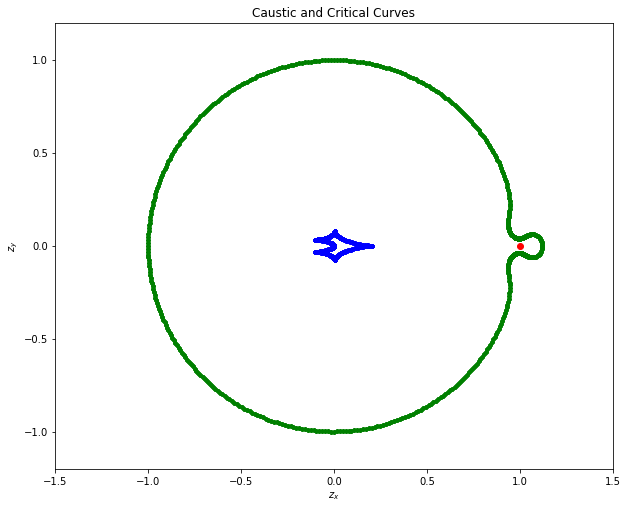

In [11]:
x=1. #separation between the planet and star is 1 einstein radius
fig = CriticalAndCaustic(200) #plot caustic and critical curves for this x value
fig.savefig("Critical_and_Caustic_Curves_x_1.pdf", bbox_inches='tight') #save the figure as a pdf

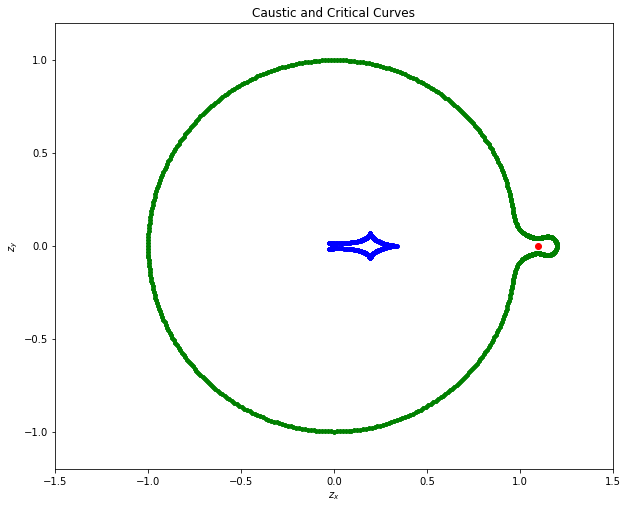

In [12]:
x = 1.10 #do the same for other values of x
fig = CriticalAndCaustic(200)
fig.savefig("Critical_and_Caustic_Curves_x_1_1.pdf", bbox_inches='tight') 

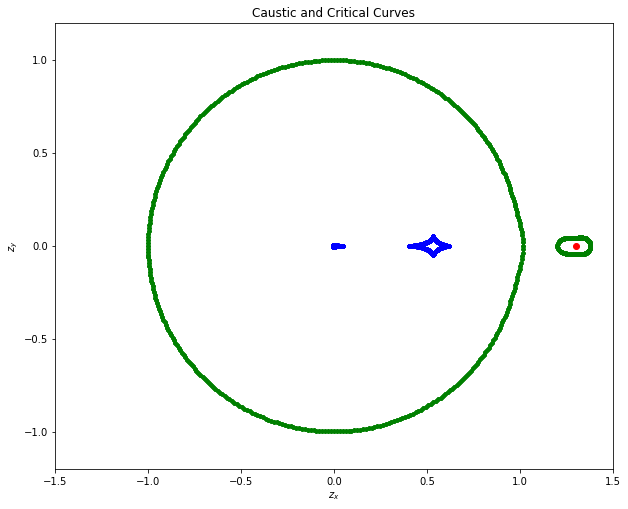

In [13]:
x = 1.3
fig = CriticalAndCaustic(200)
fig.savefig("Critical_and_Caustic_Curves_x_1_3.pdf", bbox_inches='tight') 

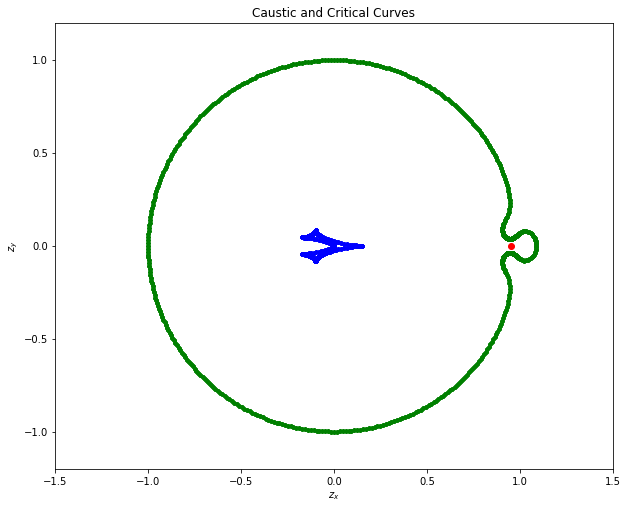

In [14]:
x = 0.95
fig = CriticalAndCaustic(200)
fig.savefig("Critical_and_Caustic_Curves_x_0_95.pdf", bbox_inches='tight') 

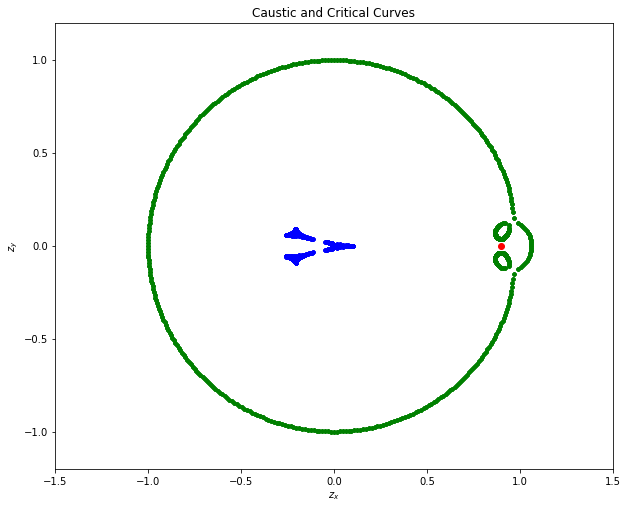

In [15]:
x=0.9
fig = CriticalAndCaustic(200)
fig.savefig("Critical_and_Caustic_Curves_x_0_9.pdf", bbox_inches='tight') 

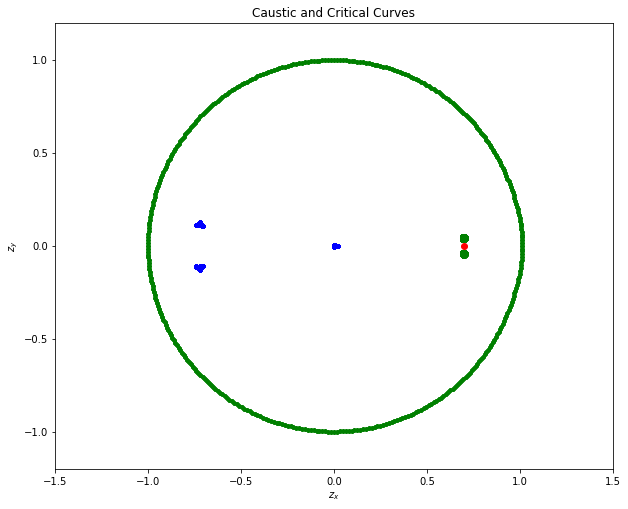

In [16]:
x=0.7
fig = CriticalAndCaustic(200)
fig.savefig("Critical_and_Caustic_Curves_x_0_7.pdf", bbox_inches='tight') 

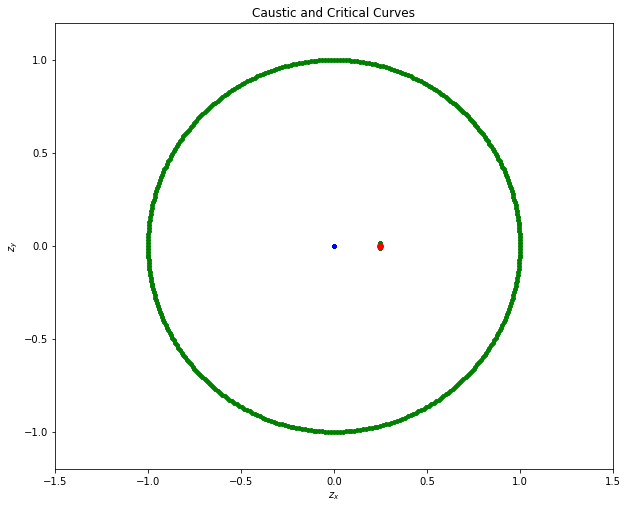

In [17]:
x=0.25
fig = CriticalAndCaustic(200)
fig.savefig("Critical_and_Caustic_Curves_x_0_25.pdf", bbox_inches='tight') 

In [18]:
# Next we want to determine the image position and its magnification compared to its source.
#We can assume that we know the source's position 

In [19]:
# create a plot of the caustic curves and image positions
def ImageAndCaustic(N): # N is proportional to the number of points used
    PhiSteps = [] # define lists of Phi,and the real and imaginary portions of 
    czetaReal = [] # z (the image position) and zeta (the caustic curves).
    czetaImag = []
    ImageReal = []
    ImageImag = []
    zetaReal = []
    zetaImag = []
    m1=100.
    m2=0.3
    i = 0
    k=0
    while i/(2*np.pi)<N: # for values of i which are less than N*2*pi to
        Phi = i*2*np.pi/N # define phi for values of 0 to 2*pi
        # to plot the curves we must solve the equation for the conjugate of z.
        coeff=[-np.exp(1j*Phi),2. * x *np.exp(Phi*1j), - x**2 * np.exp(1j*Phi) + e1(m1,m2) + e2(m1,m2), -2.*e1(m1,m2)*x, x**2. * e1(m1,m2)]
        # Write the coefficients of the polynomial and solve to find the complex conjugate of z
        Solutions = np.roots(coeff)
        #this gives 3 complex solutions for each value of phi
        PhiSteps.append(Phi)
        #Now solve the lens equation to find the complex values of zeta for each solution
        czeta = Solutions.real[0]-1j*Solutions.imag[0]-e1(m1,m2)/(Solutions[0])-e2(m1,m2)/(Solutions[0]-x)
        #append the real and imaginary portions as the x and y coordinates of the caustic curve respectively
        czetaReal.append(czeta.real)
        czetaImag.append(-1.*czeta.imag)
        czeta = Solutions.real[1]-1j*Solutions.imag[1]-e1(m1,m2)/(Solutions[1])-e2(m1,m2)/(Solutions[1]-x)
        czetaReal.append(czeta.real)
        czetaImag.append(-1.*czeta.imag)
        czeta = Solutions.real[2]-1j*Solutions.imag[2]-e1(m1,m2)/(Solutions[2])-e2(m1,m2)/(Solutions[2]-x)
        czetaReal.append(czeta.real)
        czetaImag.append(-1.*czeta.imag)
        if len(Solutions) == 4:
            czeta = Solutions.real[3]-1j*Solutions.imag[3]-e1(m1,m2)/(Solutions[3])-e2(m1,m2)/(Solutions[3]-x)
            czetaReal.append(czeta.real)
            czetaImag.append(-1.*czeta.imag)
        i+=1
    while k<4.: #this section plots the image position and position of the source star
        zeta=-2.+0.2j+1.*k #the position of the source
        zetas=-2.-0.2j+1.*k
        TotalMag=0
        coeff=[-zetas*(xs-zetas), 2.*x*xs*zetas+xs*zeta*zetas-2.*x*zetas**2-zeta*zetas**2+e1(m1,m2)*zetas-e2(m1,m2)*xs+e2(m1,m2)*zetas, -x**2*xs*zetas+2.*x*zeta*zetas**2-2.*x*zetas*e1(m1,m2)+xs*zeta*e1(m1,m2)-2.*zeta*zetas*e1(m1,m2)+x*xs*e2(m1,m2)+xs*zeta*e2(m1,m2)-2.*zeta*zetas*e2(m1,m2)+x**2*zetas**2-2.*x*xs*zeta*zetas, -x**2*zeta*zetas**2+x**2*zetas*e1(m1,m2)-x**2*zetas*e2(m1,m2)+x*e1(m1,m2)*e2(m1,m2)-2.*zeta*e1(m1,m2)*e2(m1,m2)-zeta*e2(m1,m2)**2-zeta*e1(m1,m2)**2+x*e2(m1,m2)**2+2.*x*zeta*zetas*e2(m1,m2)+x**2*xs*zeta*zetas-2.*x*xs*zeta*e1(m1,m2)+4.*x*zeta*zetas*e1(m1,m2)-x*xs*zeta*e2(m1,m2), x**2*xs*zeta*e1(m1,m2)-2.*x**2*zeta*zetas*e1(m1,m2)+2.*x*zeta*e1(m1,m2)*e2(m1,m2)+2.*x*zeta*e1(m1,m2)**2-x**2*e1(m1,m2)*e2(m1,m2),-e1(m1, m2)**2*x**2*zeta]
        ImageSolutions=np.roots(coeff) #solve for z to determine the position of the image
        #the following check to make sure that the resulting z agrees with the lens equation
        #if it does the z values are appended to a list, if not they are discarded
        sol0 = Lens(m1,m2,ImageSolutions.real[0]-1j*ImageSolutions.imag[0],ImageSolutions[0])
        sol1 = Lens(m1,m2,ImageSolutions.real[1]-1j*ImageSolutions.imag[1],ImageSolutions[1])
        sol2 = Lens(m1,m2,ImageSolutions.real[2]-1j*ImageSolutions.imag[2],ImageSolutions[2])
        sol3 = Lens(m1,m2,ImageSolutions.real[3]-1j*ImageSolutions.imag[3],ImageSolutions[3])
        sol4 = Lens(m1,m2,ImageSolutions.real[4]-1j*ImageSolutions.imag[4],ImageSolutions[4])
        if zeta.real-0.01 <= sol0.real <= zeta.real+0.01:
            ImageReal.append(ImageSolutions.real[0])
            ImageImag.append(ImageSolutions.imag[0])
        if zeta.real-0.01 <= sol1.real <= zeta.real+0.01:
            ImageReal.append(ImageSolutions.real[1])
            ImageImag.append(ImageSolutions.imag[1])
        if zeta.real-0.01 <= sol2.real <= zeta.real+0.01:
            ImageReal.append(ImageSolutions.real[2])
            ImageImag.append(ImageSolutions.imag[2])
        if zeta.real-0.01 <= sol3.real <= zeta.real+0.01:
            ImageReal.append(ImageSolutions.real[3])
            ImageImag.append(ImageSolutions.imag[3])
        if zeta.real-0.01 <= sol4.real <= zeta.real+0.01:
            ImageReal.append(ImageSolutions.real[4])
            ImageImag.append(ImageSolutions.imag[4])
        zetaReal.append(zeta.real)
        zetaImag.append(zeta.imag)
        k+=0.01 #the real portion of k increases as the source transits
    
    f = plot.figure()
    plot.plot(zetaReal,zetaImag,'c') # plot the source's trajectory in cyan,
    plot.plot(czetaReal, czetaImag, 'b.') # plot the caustic curve using blue,
    plot.ylabel('$z_y$')
    plot.xlabel('$z_x$')
    plot.title('Image Position')
    plot.axis('scaled')
    axes = plot.gca()
    axes.set_xlim([-1.5,1.5])
    axes.set_ylim([-1.2,1.2])
    figure = pylab.gcf()
    figure.set_size_inches(9,6)
    plot.plot(ImageReal,ImageImag,'go')# plot the image in green,
    plot.plot([x.real], [x.imag], 'ro') # and the position of the planet in red
    plot.show()
    return f

In [20]:
#this section determines the magnification of the source as the source transits behind the lens
def Magnification(N):
    Magnification= []
    ZetaVals=[]
    SingleMag = []
    m1=100.
    m2=0.3
    k = 0
    while k<4.:
        zeta=-2.+0.2j+1.*k #same as before
        zetas=-2.-0.2j+1.*k
        TotalMag=0
        coeff=[-zetas*(xs-zetas), 2.*x*xs*zetas+xs*zeta*zetas-2.*x*zetas**2-zeta*zetas**2+e1(m1,m2)*zetas-e2(m1,m2)*xs+e2(m1,m2)*zetas, -x**2*xs*zetas+2.*x*zeta*zetas**2-2.*x*zetas*e1(m1,m2)+xs*zeta*e1(m1,m2)-2.*zeta*zetas*e1(m1,m2)+x*xs*e2(m1,m2)+xs*zeta*e2(m1,m2)-2.*zeta*zetas*e2(m1,m2)+x**2*zetas**2-2.*x*xs*zeta*zetas, -x**2*zeta*zetas**2+x**2*zetas*e1(m1,m2)-x**2*zetas*e2(m1,m2)+x*e1(m1,m2)*e2(m1,m2)-2.*zeta*e1(m1,m2)*e2(m1,m2)-zeta*e2(m1,m2)**2-zeta*e1(m1,m2)**2+x*e2(m1,m2)**2+2.*x*zeta*zetas*e2(m1,m2)+x**2*xs*zeta*zetas-2.*x*xs*zeta*e1(m1,m2)+4.*x*zeta*zetas*e1(m1,m2)-x*xs*zeta*e2(m1,m2), x**2*xs*zeta*e1(m1,m2)-2.*x**2*zeta*zetas*e1(m1,m2)+2.*x*zeta*e1(m1,m2)*e2(m1,m2)+2.*x*zeta*e1(m1,m2)**2-x**2*e1(m1,m2)*e2(m1,m2),-e1(m1, m2)**2*x**2*zeta]
        ImageSolutions=np.roots(coeff)
        sol0 = Lens(m1,m2,ImageSolutions.real[0]-1j*ImageSolutions.imag[0],ImageSolutions[0])
        sol1 = Lens(m1,m2,ImageSolutions.real[1]-1j*ImageSolutions.imag[1],ImageSolutions[1])
        sol2 = Lens(m1,m2,ImageSolutions.real[2]-1j*ImageSolutions.imag[2],ImageSolutions[2])
        sol3 = Lens(m1,m2,ImageSolutions.real[3]-1j*ImageSolutions.imag[3],ImageSolutions[3])
        sol4 = Lens(m1,m2,ImageSolutions.real[4]-1j*ImageSolutions.imag[4],ImageSolutions[4])
        #if the z values agree with the lens equations above, the magnification A is determined using
        # the determinants of the Jacobian shown below
        J0 = detJ(ImageSolutions[0], ImageSolutions.real[0]-1j*ImageSolutions.imag[0],m1,m2)
        J1 = detJ(ImageSolutions[1], ImageSolutions.real[1]-1j*ImageSolutions.imag[1],m1,m2)
        J2 = detJ(ImageSolutions[2], ImageSolutions.real[2]-1j*ImageSolutions.imag[2],m1,m2)
        J3 = detJ(ImageSolutions[3], ImageSolutions.real[3]-1j*ImageSolutions.imag[3],m1,m2)
        J4 = detJ(ImageSolutions[4], ImageSolutions.real[4]-1j*ImageSolutions.imag[4],m1,m2)
        if zeta.real-0.01 <= sol0.real <= zeta.real+0.01:
            TotalMag+=1./(J0.real**2+J0.imag**2)**(0.5)
            #the magnification of each image is added to the total magnification for that source position
        if zeta.real-0.01 <= sol1.real <= zeta.real+0.01:
            TotalMag+=1./(J1.real**2+J1.imag**2)**(0.5)
        if zeta.real-0.01 <= sol2.real <= zeta.real+0.01:
            TotalMag+=1./(J2.real**2+J2.imag**2)**(0.5)
        if zeta.real-0.01 <= sol3.real <= zeta.real+0.01:
            TotalMag+=1./(J3.real**2+J3.imag**2)**(0.5)
        if zeta.real-0.01 <= sol4.real <= zeta.real+0.01:
            TotalMag+=1./(J4.real**2+J4.imag**2)**(0.5)
        Magnification.append(TotalMag) #the total magnification at that position is appended
        ZetaVals.append(zeta.real)
        #now determine the magnification for a single lens object (just the star)
        A = (zeta**2+2)/(zeta*(zeta**2+4)**(0.5))
        SingleMag.append((A.real**2+A.imag**2)**(0.5))
        k+=0.01
    
    #the magnification is plotted as a function of the source's position
    f = plot.figure()
    plot.semilogy(ZetaVals,SingleMag, 'r--') #plot single lens magnification
    plot.semilogy(ZetaVals,Magnification) # plot star-planet lens magnification
    plot.ylabel('Magnification')
    plot.xlabel('Source Star Position')
    plot.title('Magnification of Source Star')
    axes = plot.gca()
    axes.set_xlim([-1.5,1.5])
    figure = pylab.gcf()
    figure.set_size_inches(7,6)
    return f

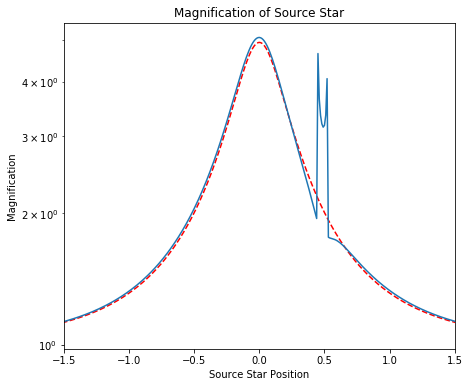

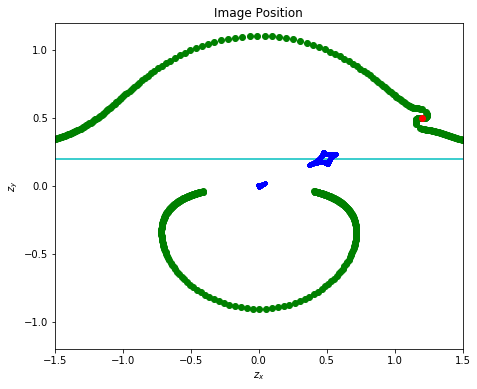

In [25]:
x =1.2+0.5j
xs = 1.2 -0.5j
fig = ImageAndCaustic(200) #plot the causitc curve and image
fig2 = Magnification(200) #plot the magnification
fig.savefig("Image_and_Caustic_Curves_x_1_2_0_5j.pdf", bbox_inches='tight') #save the image plot
fig2.savefig("Magnification_x_1_2_0_5j.pdf", bbox_inches='tight') #save the magnification plot

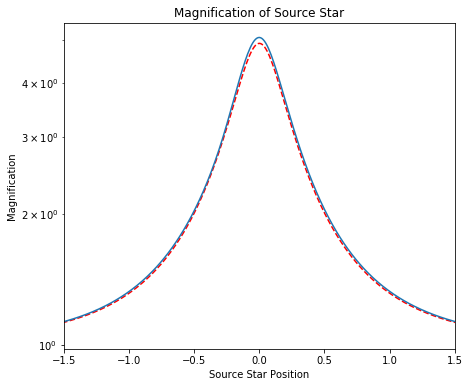

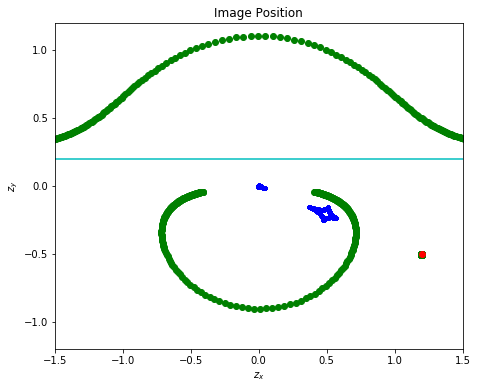

In [27]:
x =1.2-0.5j #do the same for other x values
xs = 1.2 +0.5j
fig = ImageAndCaustic(200)
fig2 = Magnification(200)
fig.savefig("Image_and_Caustic_Curves_x_1_2_-0_5j.pdf", bbox_inches='tight')
fig2.savefig("Magnification_x_1_2_-0_5j.pdf", bbox_inches='tight')

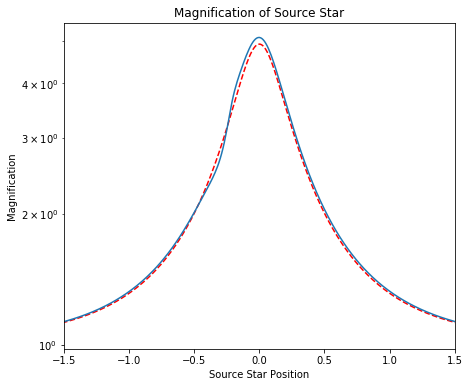

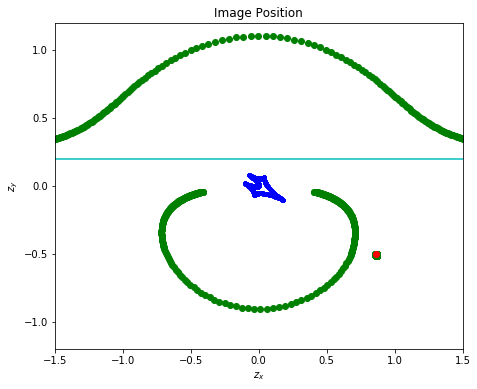

In [29]:
x =3**(0.5)/2-0.5j
xs =3**(0.5)/2 +0.5j
fig = ImageAndCaustic(200) #plot the causitc curve and image
fig2 = Magnification(200)
fig.savefig("Image_and_Caustic_Curves_x_sqrt3_2_-0_5j.pdf", bbox_inches='tight')
fig2.savefig("Magnification_x_sqrt3_2_-0_5j.pdf", bbox_inches='tight')